<a href="https://colab.research.google.com/github/deyaaa13/ThesisDhea/blob/main/FIX_FIX_BAB_4_HASIL_%26_Pembahasan.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import Library

In [ ]:
!pip install tweet-preprocessor
!pip install textblob
!pip install sastrawi
!pip install emoji
!pip install PySastrawi
!pip3 install tweepy==3.10.0

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.7/209.7 kB 5.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 431.4/431.4 kB 7.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 210.6/210.6 kB 4.7 MB/s eta 0:00:00
  Attempting uninstall: tweepy
    Found existing installation: tweepy 4.14.0
    Uninstalling tweepy-4.14.0:
      Successfully uninstalled tweepy-4.14.0


# Data Prepocessing

In [ ]:
import os
import pandas as pd
import tweepy
import re
import string
from textblob import TextBlob
import preprocessor as p
from preprocessor.api import clean, tokenize, parse
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import datetime
from datetime import timedelta
import numpy as np
import emoji
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
# Specify the path to your CSV file
file_path = '/content/drive/MyDrive/Colab Notebooks/Dataset/databmkg.csv'

# Read the CSV file into a pandas DataFrame
df = pd.read_csv(file_path, delimiter=";")

In [ ]:
df

,username,full_text
0,jaehyunmiinang,@butuhcium @infoBMKG konyol bmkg
1,thendelionswers,@jaehyunmiinang @infoBMKG LU KATA YG KASI UJAN...
2,HongQi53,@ramatama209063 @ardibhironx @infoBMKG itu dia...
3,ArgiyaMaulya,@infoBMKG Resmi rilis tadi pagi dari BMKG diwa...
4,leavemeffs,"@infoBMKG sesar nya belum terpetakan, bmkg ngg..."
...,...,...
1917,mwahhyuu,Gilak pembahasan malam ini diluar prediksi BMK...
1918,Wiji_A29,Itu dugaan bmkg sih🤣🥱
1919,JUNK1E5,Infokan bmkg manchester https://t.co/6YQESFe2uE
1920,fleursetsaphire,@ZB1_official Diluar bmkg inii maahh gantengnyaaa


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1922 entries, 0 to 1921
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   username   1922 non-null   object
 1   full_text  1922 non-null   object
dtypes: object(2)
memory usage: 30.2+ KB


In [ ]:
df.isnull().sum()

,0
username,0
full_text,0


**Case Folding** **Data Cleaning**

In [ ]:
from numpy.core.numeric import full_like
import re

def casefoldingText(full_text):
  full_text = full_text.lower()
  return full_text
df['Case_Folding']= df['full_text'].apply(casefoldingText)

def clean_text(full_text):
  t1 = re.sub(r'\bRT\b', '', full_text)
  t2 = re.sub(r'@\w+', '', t1)
  t3 = re.sub(r'@[A-Za-a0-9]+',' ',t2)
  t4 = re.sub(r'#[A-Za-z0-9]+',' ',t3)
  t5 = re.sub(r"http\S+",' ',t4)
  t6 = re.sub(r'[0-9]+',' ',t5)
  t7 = re.sub(r"[-()\"#/@;:<>{}'+=~|.!?,_]", " ", t6)
  return t7
df['Cleaned_Text'] = df['Case_Folding'].apply(clean_text)

def clearEmoji(full_text):
    return full_text.encode('ascii', 'ignore').decode('ascii')
df['Hapus_Emoji'] = df['Cleaned_Text'].apply(clearEmoji)

def remov(full_text):
  text = re.sub('[0-9]+', '', full_text)
  return full_text
df['Remove_Angka'] = df['Hapus_Emoji'].apply(lambda x: remov(x))
df.head(20)

,username,full_text,Case_Folding,Cleaned_Text,Hapus_Emoji,Remove_Angka
0,jaehyunmiinang,@butuhcium @infoBMKG konyol bmkg,@butuhcium @infobmkg konyol bmkg,konyol bmkg,konyol bmkg,konyol bmkg
1,thendelionswers,@jaehyunmiinang @infoBMKG LU KATA YG KASI UJAN...,@jaehyunmiinang @infobmkg lu kata yg kasi ujan...,lu kata yg kasi ujan bmkg anjjj😭,lu kata yg kasi ujan bmkg anjjj,lu kata yg kasi ujan bmkg anjjj
2,HongQi53,@ramatama209063 @ardibhironx @infoBMKG itu dia...,@ramatama209063 @ardibhironx @infobmkg itu dia...,itu dia lagi ngejokes bang trus itu dari b...,itu dia lagi ngejokes bang trus itu dari b...,itu dia lagi ngejokes bang trus itu dari b...
3,ArgiyaMaulya,@infoBMKG Resmi rilis tadi pagi dari BMKG diwa...,@infobmkg resmi rilis tadi pagi dari bmkg diwa...,resmi rilis tadi pagi dari bmkg diwaktu yang ...,resmi rilis tadi pagi dari bmkg diwaktu yang ...,resmi rilis tadi pagi dari bmkg diwaktu yang ...
4,leavemeffs,"@infoBMKG sesar nya belum terpetakan, bmkg ngg...","@infobmkg sesar nya belum terpetakan, bmkg ngg...",sesar nya belum terpetakan bmkg ngga ada dat...,sesar nya belum terpetakan bmkg ngga ada dat...,sesar nya belum terpetakan bmkg ngga ada dat...
5,ArgiyaMaulya,@infoBMKG Aktivitas tambang yaitu pengeboran/p...,@infobmkg aktivitas tambang yaitu pengeboran/p...,aktivitas tambang yaitu pengeboran pemngeboma...,aktivitas tambang yaitu pengeboran pemngeboma...,aktivitas tambang yaitu pengeboran pemngeboma...
6,ArgiyaMaulya,"@infoBMKG Tolong bmkg pusat,,,saya tinggal &am...","@infobmkg tolong bmkg pusat,,,saya tinggal &am...",tolong bmkg pusat saya tinggal &amp berada...,tolong bmkg pusat saya tinggal &amp berada...,tolong bmkg pusat saya tinggal &amp berada...
7,audia_alfatihah,@infoBMKG Thanks info BMKG saya ngerasain bgt....,@infobmkg thanks info bmkg saya ngerasain bgt....,thanks info bmkg saya ngerasain bgt cari in...,thanks info bmkg saya ngerasain bgt cari in...,thanks info bmkg saya ngerasain bgt cari in...
8,GTakguna,"@infoBMKG Asu beneran hujan, whaahhaaaa jan sa...","@infobmkg asu beneran hujan, whaahhaaaa jan sa...",asu beneran hujan whaahhaaaa jan salah boi i...,asu beneran hujan whaahhaaaa jan salah boi i...,asu beneran hujan whaahhaaaa jan salah boi i...
9,dean78957,@infoBMKG Semoga tidak terjadi adanya kurban a...,@infobmkg semoga tidak terjadi adanya kurban a...,semoga tidak terjadi adanya kurban atas benca...,semoga tidak terjadi adanya kurban atas benca...,semoga tidak terjadi adanya kurban atas benca...


**Remove Stopwords, Tokenize, Stemming**

In [ ]:
#import stopword
import nltk
nltk.download('stopwords')

from nltk.corpus import stopwords
stopwords_indonesia = stopwords.words('indonesian')

from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory, StopWordRemover, ArrayDictionary

stop_factory = StopWordRemoverFactory().get_stop_words()
more_stopwords = ['yaa', 'hahaha', 'mag', 'nov', 'lok', 'wib', 'update', 'hari', 'ku', 'yt', 'bis', 'anjrt',
                  'dini', 'tar', 'gue', 'bk', 'grgr', 'wuar', 'byasah', 'di', 'broo', 'presiksi', 'bis', 'anjrt',
                  'rep', 'igs', 'blio', 'hahahahhajau', 'aowkwosjisjsjsowjwu', 'yahahahahahah', 'monitoring',
                  'seventeen', 'looh', 'ndek', 'ndi', 'anjir', 'lo', 'oe', 'tala', 'loo', 'bokep', 'looo',
                  'haiyaaa', 'sugoi', "every", 'swf', 'crew', 'anjr', 'top', 'tap', 'keknya', 'bakal', 'mw',
                  'tah', 'wkkskww', 'imma', 'dpn', 'blkg', 'bjirrr', 'bill', 'bonci', 'bjrooottttttttt',
                  'doi', 'wkwk', 'well', 'ibu2', 'hehe', 'anjing', 'bendino', 'jebi', 'anjjj', 'lu', 'gue', 'ge', 'whattttt',
                  'gapapa', 'kak', 'bjir', 'mulu', 'fak', 'blong', 'pre', 'loved', 'wkwkwkwk', 'nurul', 'ki',
                  'wes', 'udaaaan', 'sumuk', 'ngene', 'jare', 'mmg', 'telpon', 'anjir', 'njirr', 'anjay', 'a en je a ye', 'anjirrr',
                  'kalo', 'trs', 'jd', 'nih', 'ntar', 'nya', 'lg', 'gk', 'ecusli', 'dpt', 'kdlmn', 'ls', 'pgr', 'wib', 'wit',
                  'papuabrt', 'untuk', 'dari', 'pkl', 'ubah', 'iring', 'wilayah', 'kamu', 'oct', 'buat', 'tanggal', 'oktober',
                  'disclaimer', 'wita', 'baratdaya', 'sih', 'cek', 'kalau', 'baratlaut', 'daerah', 'banget',
                  'buat', 'tenggara', 'moga', 'ii', 'vii', 'kedlmn', 'anjjj', 'lu', 'lho', 'whaahhaaa','tuh', 'meh', 'dongg', 'boi', 'mbk',
                  'amp', 'pem', 'kotim', 'jogjaa', 'bmth', 'gin', 'ekon', 'njir', 'si', 'ck', 'deh', 'eh', 'nich', 'woe', 'tok', 'mu', 'ptsp',
                  'wa', 'mah', 'bal', 'aya', 'wae', 'ilah', 'tu', 'bpbd', 'nubuah', 'swt', 'kam', 'mndo', 'dar', 'tmp','dg', 'app', 'lah', 'bu',
                  'yakan', 'lahh', 'turu', 'lak', 'isoo', 'bar', 'ngetwit', 'jdksks', 'teruss', 'uplode', 'wkwkw', 'las', 'am', 'upt', 'parigimoutong',
                  'hayabusa', 'lhy', 'divaniwonie', 'andi', 'hendri', 'aidtya', 'tegar', 'masyongg', 'akuuu;', 'banh', 'bms', 'oy', 'emak', 'gtu', 'aduh',
                  'sg', 'lhoo', 'ngendi', 'anjrrr', 'vt', 'pol', 'bat', 'gueee', 'storyne', 'karo', 'cm', 'yaaa', 'spe', 'neneku', 'kangsung',
                  'sw', 'masbro', 'yg', 'twtnya', 'yuhuuu', 'mjb', 'habistu', 'jk', 'dudu', 'nek', 'ono', 'doanh', 'elnino', 'wihh', 'mbak', 'sibreh',
                  'spam', 'ngedorong', 'kli', 'sang', 'cuy', 'of', 'lnjut', 'an', 'tek', 'menghatrust', 'horeg', 'akuuu', 'woii', 'brusan',
                  'awokawok', 'sp', 'the', 'aduh', 'inimah', 'rumaa', 'tang', 'satsetnya', 'ngabarine', 'jogjaa', 'mantaaap']
data = stop_factory + more_stopwords

dictionary = ArrayDictionary(data)
stwr = StopWordRemover(dictionary)

print(data)


#import sastrawi
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
factory = StemmerFactory()
stemmer = factory.create_stemmer()

#tokenize
from nltk.tokenize import TweetTokenizer

def clean_tweets(fulltext):

    #tokenize tweets
    tokenizer = TweetTokenizer(preserve_case = False, strip_handles = True, reduce_len = True)
    tweet_tokens = tokenizer.tokenize(fulltext)

    tweets_clean = []
    for word in tweet_tokens:
        if(word not in data and #remove stopwords
            word not in string.punctuation): #remove punctuation
          #tweets_clean.append(word)
          stem_word = stemmer.stem(word) #stemming word
          tweets_clean.append(stem_word)

    return tweets_clean
df['Tweet'] = df['Remove_Angka'].apply(lambda x: clean_tweets(x))
df

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


['a', 'ada', 'adalah', 'adanya', 'adapun', 'agak', 'agaknya', 'agar', 'akan', 'akankah', 'akhir', 'akhiri', 'akhirnya', 'aku', 'akulah', 'amat', 'amatlah', 'anda', 'andalah', 'antar', 'antara', 'antaranya', 'apa', 'apaan', 'apabila', 'apakah', 'apalagi', 'apatah', 'arti', 'artinya', 'asal', 'asalkan', 'atas', 'atau', 'ataukah', 'ataupun', 'awal', 'awalnya', 'b', 'bagai', 'bagaikan', 'bagaimana', 'bagaimanakah', 'bagaimanapun', 'bagainamakah', 'bagi', 'bagian', 'bahkan', 'bahwa', 'bahwasannya', 'bahwasanya', 'baik', 'baiklah', 'bakal', 'bakalan', 'balik', 'banyak', 'bapak', 'baru', 'bawah', 'beberapa', 'begini', 'beginian', 'beginikah', 'beginilah', 'begitu', 'begitukah', 'begitulah', 'begitupun', 'bekerja', 'belakang', 'belakangan', 'belum', 'belumlah', 'benar', 'benarkah', 'benarlah', 'berada', 'berakhir', 'berakhirlah', 'berakhirnya', 'berapa', 'berapakah', 'berapalah', 'berapapun', 'berarti', 'berawal', 'berbagai', 'berdatangan', 'beri', 'berikan', 'berikut', 'berikutnya', 'berjumla

,username,full_text,Case_Folding,Cleaned_Text,Hapus_Emoji,Remove_Angka,Tweet
0,jaehyunmiinang,@butuhcium @infoBMKG konyol bmkg,@butuhcium @infobmkg konyol bmkg,konyol bmkg,konyol bmkg,konyol bmkg,"[konyol, bmkg]"
1,thendelionswers,@jaehyunmiinang @infoBMKG LU KATA YG KASI UJAN...,@jaehyunmiinang @infobmkg lu kata yg kasi ujan...,lu kata yg kasi ujan bmkg anjjj😭,lu kata yg kasi ujan bmkg anjjj,lu kata yg kasi ujan bmkg anjjj,"[kasi, ujan, bmkg]"
2,HongQi53,@ramatama209063 @ardibhironx @infoBMKG itu dia...,@ramatama209063 @ardibhironx @infobmkg itu dia...,itu dia lagi ngejokes bang trus itu dari b...,itu dia lagi ngejokes bang trus itu dari b...,itu dia lagi ngejokes bang trus itu dari b...,"[ngejokes, bang, trus, bmkg, udah, dijelasin, ..."
3,ArgiyaMaulya,@infoBMKG Resmi rilis tadi pagi dari BMKG diwa...,@infobmkg resmi rilis tadi pagi dari bmkg diwa...,resmi rilis tadi pagi dari bmkg diwaktu yang ...,resmi rilis tadi pagi dari bmkg diwaktu yang ...,resmi rilis tadi pagi dari bmkg diwaktu yang ...,"[resmi, rilis, pagi, bmkg, waktu, malam, dibeb..."
4,leavemeffs,"@infoBMKG sesar nya belum terpetakan, bmkg ngg...","@infobmkg sesar nya belum terpetakan, bmkg ngg...",sesar nya belum terpetakan bmkg ngga ada dat...,sesar nya belum terpetakan bmkg ngga ada dat...,sesar nya belum terpetakan bmkg ngga ada dat...,"[sesar, peta, bmkg, ngga, data, sesar, aktif, ..."
...,...,...,...,...,...,...,...
1917,mwahhyuu,Gilak pembahasan malam ini diluar prediksi BMK...,gilak pembahasan malam ini diluar prediksi bmk...,gilak pembahasan malam ini diluar prediksi bmkg,gilak pembahasan malam ini diluar prediksi bmkg,gilak pembahasan malam ini diluar prediksi bmkg,"[gilak, bahas, malam, luar, prediksi, bmkg]"
1918,Wiji_A29,Itu dugaan bmkg sih🤣🥱,itu dugaan bmkg sih🤣🥱,itu dugaan bmkg sih🤣🥱,itu dugaan bmkg sih,itu dugaan bmkg sih,"[duga, bmkg]"
1919,JUNK1E5,Infokan bmkg manchester https://t.co/6YQESFe2uE,infokan bmkg manchester https://t.co/6yqesfe2ue,infokan bmkg manchester,infokan bmkg manchester,infokan bmkg manchester,"[info, bmkg, manchester]"
1920,fleursetsaphire,@ZB1_official Diluar bmkg inii maahh gantengnyaaa,@zb1_official diluar bmkg inii maahh gantengnyaaa,diluar bmkg inii maahh gantengnyaaa,diluar bmkg inii maahh gantengnyaaa,diluar bmkg inii maahh gantengnyaaa,"[luar, bmkg, ini, maahh, gantengnyaaa]"


**Normalisasi**

In [ ]:
def convertToSlangword(text):
    kamusSlang = eval(open("slangwords.txt").read())
    pattern = re.compile(r'\b( ' + '|'.join (kamusSlang.keys())+r')\b')
    content = []
    for kata in text:
        filterSlang = pattern.sub(lambda x: kamusSlang[x.group()],kata)
        content.append(filterSlang.lower())
    text = content
    return text

df['Normalisasi'] = df['Tweet'].apply(convertToSlangword)
df

,username,full_text,Case_Folding,Cleaned_Text,Hapus_Emoji,Remove_Angka,Tweet,Normalisasi
0,jaehyunmiinang,@butuhcium @infoBMKG konyol bmkg,@butuhcium @infobmkg konyol bmkg,konyol bmkg,konyol bmkg,konyol bmkg,"[konyol, bmkg]","[konyol, bmkg]"
1,thendelionswers,@jaehyunmiinang @infoBMKG LU KATA YG KASI UJAN...,@jaehyunmiinang @infobmkg lu kata yg kasi ujan...,lu kata yg kasi ujan bmkg anjjj😭,lu kata yg kasi ujan bmkg anjjj,lu kata yg kasi ujan bmkg anjjj,"[kasi, ujan, bmkg]","[kasih, hujan, bmkg]"
2,HongQi53,@ramatama209063 @ardibhironx @infoBMKG itu dia...,@ramatama209063 @ardibhironx @infobmkg itu dia...,itu dia lagi ngejokes bang trus itu dari b...,itu dia lagi ngejokes bang trus itu dari b...,itu dia lagi ngejokes bang trus itu dari b...,"[ngejokes, bang, trus, bmkg, udah, dijelasin, ...","[lelucon, abang, terus, bmkg, sudah, dijelasin..."
3,ArgiyaMaulya,@infoBMKG Resmi rilis tadi pagi dari BMKG diwa...,@infobmkg resmi rilis tadi pagi dari bmkg diwa...,resmi rilis tadi pagi dari bmkg diwaktu yang ...,resmi rilis tadi pagi dari bmkg diwaktu yang ...,resmi rilis tadi pagi dari bmkg diwaktu yang ...,"[resmi, rilis, pagi, bmkg, waktu, malam, dibeb...","[resmi, diterbitkan, pagi, bmkg, waktu, malam,..."
4,leavemeffs,"@infoBMKG sesar nya belum terpetakan, bmkg ngg...","@infobmkg sesar nya belum terpetakan, bmkg ngg...",sesar nya belum terpetakan bmkg ngga ada dat...,sesar nya belum terpetakan bmkg ngga ada dat...,sesar nya belum terpetakan bmkg ngga ada dat...,"[sesar, peta, bmkg, ngga, data, sesar, aktif, ...","[sesar, peta, bmkg, tidak, data, sesar, aktif,..."
...,...,...,...,...,...,...,...,...
1917,mwahhyuu,Gilak pembahasan malam ini diluar prediksi BMK...,gilak pembahasan malam ini diluar prediksi bmk...,gilak pembahasan malam ini diluar prediksi bmkg,gilak pembahasan malam ini diluar prediksi bmkg,gilak pembahasan malam ini diluar prediksi bmkg,"[gilak, bahas, malam, luar, prediksi, bmkg]","[gila, bahas, malam, luar, prediksi, bmkg]"
1918,Wiji_A29,Itu dugaan bmkg sih🤣🥱,itu dugaan bmkg sih🤣🥱,itu dugaan bmkg sih🤣🥱,itu dugaan bmkg sih,itu dugaan bmkg sih,"[duga, bmkg]","[duga, bmkg]"
1919,JUNK1E5,Infokan bmkg manchester https://t.co/6YQESFe2uE,infokan bmkg manchester https://t.co/6yqesfe2ue,infokan bmkg manchester,infokan bmkg manchester,infokan bmkg manchester,"[info, bmkg, manchester]","[informasi, bmkg, manchester]"
1920,fleursetsaphire,@ZB1_official Diluar bmkg inii maahh gantengnyaaa,@zb1_official diluar bmkg inii maahh gantengnyaaa,diluar bmkg inii maahh gantengnyaaa,diluar bmkg inii maahh gantengnyaaa,diluar bmkg inii maahh gantengnyaaa,"[luar, bmkg, ini, maahh, gantengnyaaa]","[luar, bmkg, ini, maahh, ganteng]"


In [ ]:
def remove_punct(text):
    text = " ".join([char for char in text if char not in string.punctuation])
    return text
df['Tweets'] = df['Normalisasi'].apply(lambda x: remove_punct(x))
df.head()

,username,full_text,Case_Folding,Cleaned_Text,Hapus_Emoji,Remove_Angka,Tweet,Normalisasi,Tweets
0,jaehyunmiinang,@butuhcium @infoBMKG konyol bmkg,@butuhcium @infobmkg konyol bmkg,konyol bmkg,konyol bmkg,konyol bmkg,"[konyol, bmkg]","[konyol, bmkg]",konyol bmkg
1,thendelionswers,@jaehyunmiinang @infoBMKG LU KATA YG KASI UJAN...,@jaehyunmiinang @infobmkg lu kata yg kasi ujan...,lu kata yg kasi ujan bmkg anjjj😭,lu kata yg kasi ujan bmkg anjjj,lu kata yg kasi ujan bmkg anjjj,"[kasi, ujan, bmkg]","[kasih, hujan, bmkg]",kasih hujan bmkg
2,HongQi53,@ramatama209063 @ardibhironx @infoBMKG itu dia...,@ramatama209063 @ardibhironx @infobmkg itu dia...,itu dia lagi ngejokes bang trus itu dari b...,itu dia lagi ngejokes bang trus itu dari b...,itu dia lagi ngejokes bang trus itu dari b...,"[ngejokes, bang, trus, bmkg, udah, dijelasin, ...","[lelucon, abang, terus, bmkg, sudah, dijelasin...",lelucon abang terus bmkg sudah dijelasin pakai...
3,ArgiyaMaulya,@infoBMKG Resmi rilis tadi pagi dari BMKG diwa...,@infobmkg resmi rilis tadi pagi dari bmkg diwa...,resmi rilis tadi pagi dari bmkg diwaktu yang ...,resmi rilis tadi pagi dari bmkg diwaktu yang ...,resmi rilis tadi pagi dari bmkg diwaktu yang ...,"[resmi, rilis, pagi, bmkg, waktu, malam, dibeb...","[resmi, diterbitkan, pagi, bmkg, waktu, malam,...",resmi diterbitkan pagi bmkg waktu malam dibebe...
4,leavemeffs,"@infoBMKG sesar nya belum terpetakan, bmkg ngg...","@infobmkg sesar nya belum terpetakan, bmkg ngg...",sesar nya belum terpetakan bmkg ngga ada dat...,sesar nya belum terpetakan bmkg ngga ada dat...,sesar nya belum terpetakan bmkg ngga ada dat...,"[sesar, peta, bmkg, ngga, data, sesar, aktif, ...","[sesar, peta, bmkg, tidak, data, sesar, aktif,...",sesar peta bmkg tidak data sesar aktif situ


In [ ]:
df.drop_duplicates(subset = "Tweets", keep = 'first', inplace = True)
df.head(10)

,username,full_text,Case_Folding,Cleaned_Text,Hapus_Emoji,Remove_Angka,Tweet,Normalisasi,Tweets
0,jaehyunmiinang,@butuhcium @infoBMKG konyol bmkg,@butuhcium @infobmkg konyol bmkg,konyol bmkg,konyol bmkg,konyol bmkg,"[konyol, bmkg]","[konyol, bmkg]",konyol bmkg
1,thendelionswers,@jaehyunmiinang @infoBMKG LU KATA YG KASI UJAN...,@jaehyunmiinang @infobmkg lu kata yg kasi ujan...,lu kata yg kasi ujan bmkg anjjj😭,lu kata yg kasi ujan bmkg anjjj,lu kata yg kasi ujan bmkg anjjj,"[kasi, ujan, bmkg]","[kasih, hujan, bmkg]",kasih hujan bmkg
2,HongQi53,@ramatama209063 @ardibhironx @infoBMKG itu dia...,@ramatama209063 @ardibhironx @infobmkg itu dia...,itu dia lagi ngejokes bang trus itu dari b...,itu dia lagi ngejokes bang trus itu dari b...,itu dia lagi ngejokes bang trus itu dari b...,"[ngejokes, bang, trus, bmkg, udah, dijelasin, ...","[lelucon, abang, terus, bmkg, sudah, dijelasin...",lelucon abang terus bmkg sudah dijelasin pakai...
3,ArgiyaMaulya,@infoBMKG Resmi rilis tadi pagi dari BMKG diwa...,@infobmkg resmi rilis tadi pagi dari bmkg diwa...,resmi rilis tadi pagi dari bmkg diwaktu yang ...,resmi rilis tadi pagi dari bmkg diwaktu yang ...,resmi rilis tadi pagi dari bmkg diwaktu yang ...,"[resmi, rilis, pagi, bmkg, waktu, malam, dibeb...","[resmi, diterbitkan, pagi, bmkg, waktu, malam,...",resmi diterbitkan pagi bmkg waktu malam dibebe...
4,leavemeffs,"@infoBMKG sesar nya belum terpetakan, bmkg ngg...","@infobmkg sesar nya belum terpetakan, bmkg ngg...",sesar nya belum terpetakan bmkg ngga ada dat...,sesar nya belum terpetakan bmkg ngga ada dat...,sesar nya belum terpetakan bmkg ngga ada dat...,"[sesar, peta, bmkg, ngga, data, sesar, aktif, ...","[sesar, peta, bmkg, tidak, data, sesar, aktif,...",sesar peta bmkg tidak data sesar aktif situ
5,ArgiyaMaulya,@infoBMKG Aktivitas tambang yaitu pengeboran/p...,@infobmkg aktivitas tambang yaitu pengeboran/p...,aktivitas tambang yaitu pengeboran pemngeboma...,aktivitas tambang yaitu pengeboran pemngeboma...,aktivitas tambang yaitu pengeboran pemngeboma...,"[aktivitas, tambang, bor, pemngeboman, dasar, ...","[aktivitas, tambang, bor, pengeboman, dasar, b...",aktivitas tambang bor pengeboman dasar bumi ba...
6,ArgiyaMaulya,"@infoBMKG Tolong bmkg pusat,,,saya tinggal &am...","@infobmkg tolong bmkg pusat,,,saya tinggal &am...",tolong bmkg pusat saya tinggal &amp berada...,tolong bmkg pusat saya tinggal &amp berada...,tolong bmkg pusat saya tinggal &amp berada...,"[tolong, bmkg, pusat, tinggal, lokasi, rasa, a...","[tolong, bmkg, pusat, tinggal, lokasi, rasa, a...",tolong bmkg pusat tinggal lokasi rasa aktivita...
7,audia_alfatihah,@infoBMKG Thanks info BMKG saya ngerasain bgt....,@infobmkg thanks info bmkg saya ngerasain bgt....,thanks info bmkg saya ngerasain bgt cari in...,thanks info bmkg saya ngerasain bgt cari in...,thanks info bmkg saya ngerasain bgt cari in...,"[thanks, info, bmkg, ngerasain, bgt, cari, inf...","[terima kasih, informasi, bmkg, merasakan, ban...",terima kasih informasi bmkg merasakan banget c...
8,GTakguna,"@infoBMKG Asu beneran hujan, whaahhaaaa jan sa...","@infobmkg asu beneran hujan, whaahhaaaa jan sa...",asu beneran hujan whaahhaaaa jan salah boi i...,asu beneran hujan whaahhaaaa jan salah boi i...,asu beneran hujan whaahhaaaa jan salah boi i...,"[asu, beneran, hujan, jan, salah, bmkg]","[anjing, beneran, hujan, jangan, salah, bmkg]",anjing beneran hujan jangan salah bmkg
9,dean78957,@infoBMKG Semoga tidak terjadi adanya kurban a...,@infobmkg semoga tidak terjadi adanya kurban a...,semoga tidak terjadi adanya kurban atas benca...,semoga tidak terjadi adanya kurban atas benca...,semoga tidak terjadi adanya kurban atas benca...,"[moga, kurban, bencana, moga, alat, ditektor, ...","[semoga, korban, bencana, semoga, alat, pendet...",semoga korban bencana semoga alat pendeteksi g...


In [ ]:
df = df.reset_index(drop = True)
df.head()

,username,full_text,Case_Folding,Cleaned_Text,Hapus_Emoji,Remove_Angka,Tweet,Normalisasi,Tweets
0,jaehyunmiinang,@butuhcium @infoBMKG konyol bmkg,@butuhcium @infobmkg konyol bmkg,konyol bmkg,konyol bmkg,konyol bmkg,"[konyol, bmkg]","[konyol, bmkg]",konyol bmkg
1,thendelionswers,@jaehyunmiinang @infoBMKG LU KATA YG KASI UJAN...,@jaehyunmiinang @infobmkg lu kata yg kasi ujan...,lu kata yg kasi ujan bmkg anjjj😭,lu kata yg kasi ujan bmkg anjjj,lu kata yg kasi ujan bmkg anjjj,"[kasi, ujan, bmkg]","[kasih, hujan, bmkg]",kasih hujan bmkg
2,HongQi53,@ramatama209063 @ardibhironx @infoBMKG itu dia...,@ramatama209063 @ardibhironx @infobmkg itu dia...,itu dia lagi ngejokes bang trus itu dari b...,itu dia lagi ngejokes bang trus itu dari b...,itu dia lagi ngejokes bang trus itu dari b...,"[ngejokes, bang, trus, bmkg, udah, dijelasin, ...","[lelucon, abang, terus, bmkg, sudah, dijelasin...",lelucon abang terus bmkg sudah dijelasin pakai...
3,ArgiyaMaulya,@infoBMKG Resmi rilis tadi pagi dari BMKG diwa...,@infobmkg resmi rilis tadi pagi dari bmkg diwa...,resmi rilis tadi pagi dari bmkg diwaktu yang ...,resmi rilis tadi pagi dari bmkg diwaktu yang ...,resmi rilis tadi pagi dari bmkg diwaktu yang ...,"[resmi, rilis, pagi, bmkg, waktu, malam, dibeb...","[resmi, diterbitkan, pagi, bmkg, waktu, malam,...",resmi diterbitkan pagi bmkg waktu malam dibebe...
4,leavemeffs,"@infoBMKG sesar nya belum terpetakan, bmkg ngg...","@infobmkg sesar nya belum terpetakan, bmkg ngg...",sesar nya belum terpetakan bmkg ngga ada dat...,sesar nya belum terpetakan bmkg ngga ada dat...,sesar nya belum terpetakan bmkg ngga ada dat...,"[sesar, peta, bmkg, ngga, data, sesar, aktif, ...","[sesar, peta, bmkg, tidak, data, sesar, aktif,...",sesar peta bmkg tidak data sesar aktif situ


In [ ]:
#remove kolom
df.drop(df.columns[[0,1,2,3,4,5,6,7]], axis = 1, inplace = True)
df.head()

,Tweets
0,konyol bmkg
1,kasih hujan bmkg
2,lelucon abang terus bmkg sudah dijelasin pakai...
3,resmi diterbitkan pagi bmkg waktu malam dibebe...
4,sesar peta bmkg tidak data sesar aktif situ


In [ ]:
#simpan data bersih
df.to_csv('Databersihbmkg.csv', encoding = 'utf8', index = False)

#**Labelling**

In [ ]:
df_2 = pd.read_csv('Databersihbmkg.csv')
df_2.head()

,Tweets
0,konyol bmkg
1,kasih hujan bmkg
2,lelucon abang terus bmkg sudah dijelasin pakai...
3,resmi diterbitkan pagi bmkg waktu malam dibebe...
4,sesar peta bmkg tidak data sesar aktif situ


In [ ]:
df.info

<bound method DataFrame.info of                                                  Tweets
0                                           konyol bmkg
1                                      kasih hujan bmkg
2     lelucon abang terus bmkg sudah dijelasin pakai...
3     resmi diterbitkan pagi bmkg waktu malam dibebe...
4           sesar peta bmkg tidak data sesar aktif situ
...                                                 ...
1742              bimoli ny dari mna luar prediksi bmkg
1743  emang koh suka ade aje emang laku luar prediks...
1744                gila bahas malam luar prediksi bmkg
1745                        luar bmkg ini maahh ganteng
1746  putaran cerita teman club penggemar belah semu...

[1747 rows x 1 columns]>

In [ ]:
lexicon_positive = dict()
import csv
with open('lexicon_positive_ver1.csv', 'r') as csvfile:
  reader = csv.reader(csvfile, delimiter=',')
  for row in reader:
    lexicon_positive[row[0]] = int(row[1])

lexicon_negative = dict()
import csv
with open('lexicon_negative_ver1.csv', 'r') as csvfile:
  reader = csv.reader(csvfile, delimiter=',')
  for row in reader:
    lexicon_negative[row[0]] = int(row[1])

def sentiment_analysis_lexicon_indonesia(text):
  score = 0
  for word in text:
    if (word in lexicon_positive):
      score = score + lexicon_positive[word]
  for word in text:
    if (word in lexicon_negative):
      score = score + lexicon_negative[word]
  polarity=''
  if (score >= 0):
    polarity = 'positif'
  else :
    polarity = 'negatif'
  return score, polarity

In [ ]:
string = "konyol bmkg"
string = string.split()
hasil = sentiment_analysis_lexicon_indonesia(string)
hasil

(-3, 'negatif')

In [ ]:
df_2 = df_2.replace('',np.nan, regex=True)
df_2 = df_2.dropna()

In [ ]:
df_2 = df_2.reset_index(drop=True)

In [ ]:
df_2['prepos_text'] = df_2.Tweets.str.split()

In [ ]:
results = df_2['prepos_text'].apply(sentiment_analysis_lexicon_indonesia)
results = list(zip(*results))
df_2['polarity_score'] = results[0]
df_2['polarity'] = results[1]
print(df_2['polarity'].value_counts())

polarity
positif    971
negatif    775
Name: count, dtype: int64


In [ ]:
df_2.head(20)

,Tweets,prepos_text,polarity_score,polarity
0,konyol bmkg,"[konyol, bmkg]",-3,negatif
1,kasih hujan bmkg,"[kasih, hujan, bmkg]",0,positif
2,lelucon abang terus bmkg sudah dijelasin pakai...,"[lelucon, abang, terus, bmkg, sudah, dijelasin...",1,positif
3,resmi diterbitkan pagi bmkg waktu malam dibebe...,"[resmi, diterbitkan, pagi, bmkg, waktu, malam,...",12,positif
4,sesar peta bmkg tidak data sesar aktif situ,"[sesar, peta, bmkg, tidak, data, sesar, aktif,...",-9,negatif
5,aktivitas tambang bor pengeboman dasar bumi ba...,"[aktivitas, tambang, bor, pengeboman, dasar, b...",9,positif
6,tolong bmkg pusat tinggal lokasi rasa aktivita...,"[tolong, bmkg, pusat, tinggal, lokasi, rasa, a...",3,positif
7,terima kasih informasi bmkg merasakan banget c...,"[terima, kasih, informasi, bmkg, merasakan, ba...",-5,negatif
8,anjing beneran hujan jangan salah bmkg,"[anjing, beneran, hujan, jangan, salah, bmkg]",-9,negatif
9,semoga korban bencana semoga alat pendeteksi g...,"[semoga, korban, bencana, semoga, alat, pendet...",-2,negatif


<ipython-input-25-77e5729ca99d>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x='polarity', data=df_2, palette=['red','lightskyblue'])


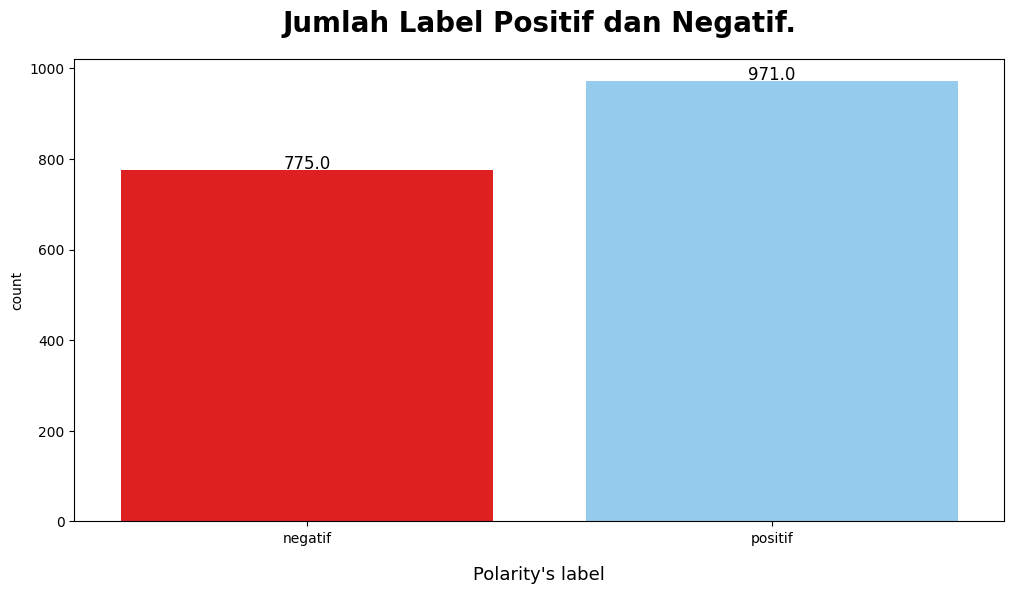

In [ ]:
# membuat visualisasi bar chart untuk menampilkan jumlah sentimen positif dan negatif

fig, ax = plt.subplots(figsize=(12,6))
ax = sns.countplot(x='polarity', data=df_2, palette=['red','lightskyblue'])

for rect in ax.patches:
    ax.text (rect.get_x() + rect.get_width()  / 2,rect.get_height()+ 3.25,rect.get_height(),
             horizontalalignment='center', fontsize = 12)

plt.title("Jumlah Label Positif dan Negatif.", fontsize=20, fontweight='bold',pad=20)
plt.xlabel("Polarity's label", fontsize=13, labelpad=15)
plt.ylim(0)
plt.show()

In [ ]:
# mengonversikan sentimen menjadi 1 untuk positif dan -1 untuk negatif
polarity = []
for convert in df_2['polarity']:
  if convert == "positif":
    num_polarity = 1
  else:
    num_polarity = -1

  polarity.append(num_polarity)
df_2['polarity'] = polarity

In [ ]:
df_2['polarity']

,polarity
0,-1
1,1
2,1
3,1
4,-1
...,...
1741,-1
1742,1
1743,1
1744,1


In [ ]:
df_2.polarity.value_counts()

,count
polarity,
1,971
-1,775


In [ ]:
print("Hasil Persentase Sentimen:")
train_pct_pos = df_2.polarity.value_counts()[1]/df_2.polarity.value_counts().sum()*100
print("Persentase Sentimen Positif:", round(train_pct_pos,2), '%')

train_pct_neg = df_2.polarity.value_counts()[-1]/df_2.polarity.value_counts().sum()*100
print("Persentase Sentimen Negatif:", round(train_pct_neg,2), '%')

print("Perbedaan antara persentase positif dan negatif :", round(train_pct_pos-train_pct_neg,2), '%')

Hasil Persentase Sentimen:
Persentase Sentimen Positif: 55.61 %
Persentase Sentimen Negatif: 44.39 %
Perbedaan antara persentase positif dan negatif : 11.23 %


**Wordcloud Positif**

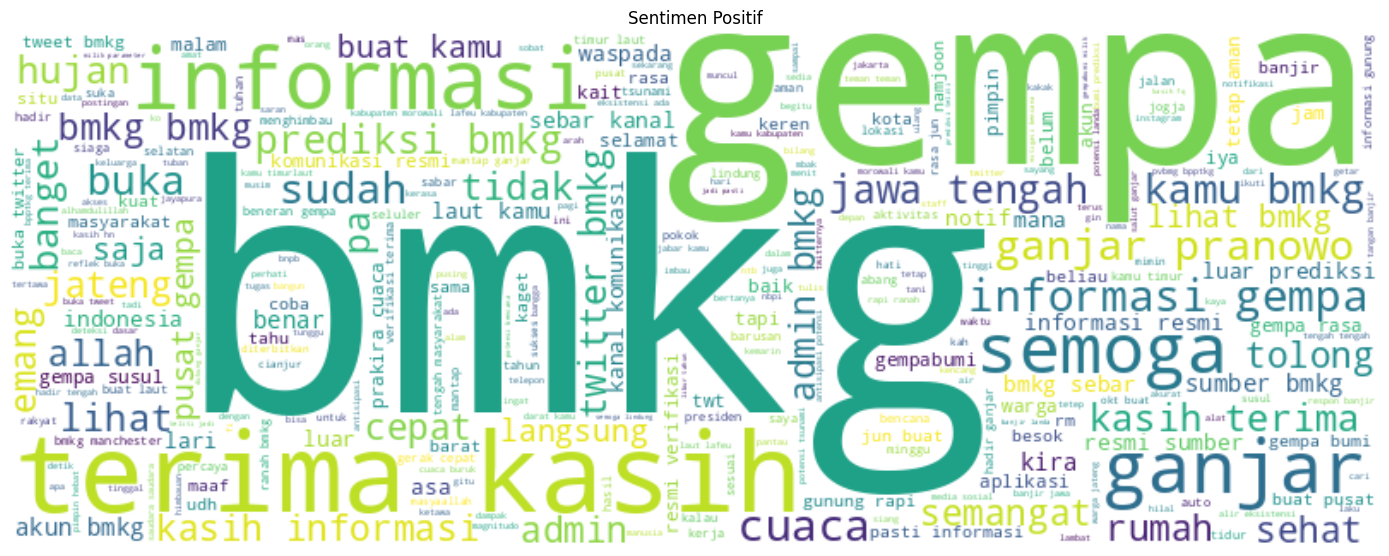

In [ ]:
sentiment_pos = ' '.join([review for review in df_2['Tweets'][df_2['polarity'] == 1]])

# create object wordcloud
w_pos = WordCloud(background_color="white",
                  width=800, height=300, max_font_size=200,
                  max_words=500).generate(sentiment_pos)

plt.figure(figsize=(14,8))
plt.axis("off")
plt.tight_layout()
plt.title('Sentimen Positif')
plt.imshow(w_pos, interpolation="bilinear")
plt.show()

**WordCloud Negatif**

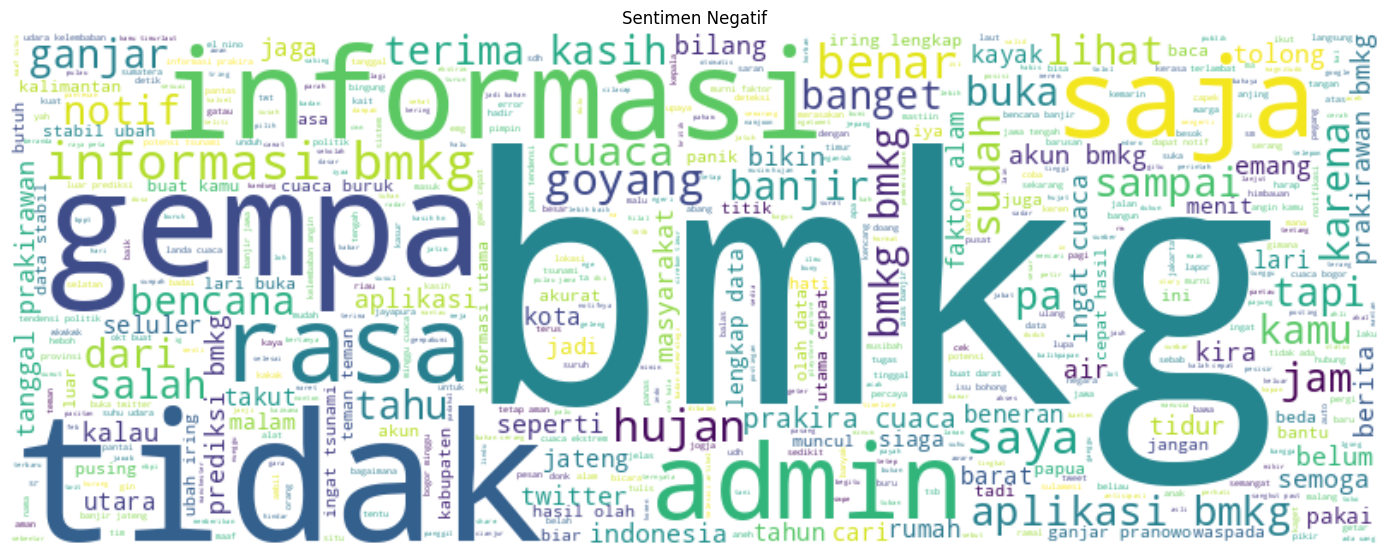

In [ ]:
sentiment_neg = ' '.join([review for review in df_2['Tweets'][df_2['polarity'] == -1]])

# create object wordcloud
w_neg = WordCloud(background_color="white",
                  width=800, height=300, max_font_size=200,
                  max_words=500).generate(sentiment_neg)

plt.figure(figsize=(14,8))
plt.axis("off")
plt.tight_layout()
plt.title('Sentimen Negatif')
plt.imshow(w_neg, interpolation="bilinear")
plt.show()

In [ ]:
df_2.head()

,Tweets,prepos_text,polarity_score,polarity
0,konyol bmkg,"[konyol, bmkg]",-3,-1
1,kasih hujan bmkg,"[kasih, hujan, bmkg]",0,1
2,lelucon abang terus bmkg sudah dijelasin pakai...,"[lelucon, abang, terus, bmkg, sudah, dijelasin...",1,1
3,resmi diterbitkan pagi bmkg waktu malam dibebe...,"[resmi, diterbitkan, pagi, bmkg, waktu, malam,...",12,1
4,sesar peta bmkg tidak data sesar aktif situ,"[sesar, peta, bmkg, tidak, data, sesar, aktif,...",-9,-1


In [ ]:
df_2 = df_2.drop(df_2.columns[[1,2]], axis=1)

In [ ]:
df_2.head()

,Tweets,polarity
0,konyol bmkg,-1
1,kasih hujan bmkg,1
2,lelucon abang terus bmkg sudah dijelasin pakai...,1
3,resmi diterbitkan pagi bmkg waktu malam dibebe...,1
4,sesar peta bmkg tidak data sesar aktif situ,-1


In [ ]:
df_2.to_csv('HasilDataBmkg.csv', encoding = 'utf8', index = False)

Distribusi Kelas setelah Labeling:
polarity
 1    971
-1    775
Name: count, dtype: int64


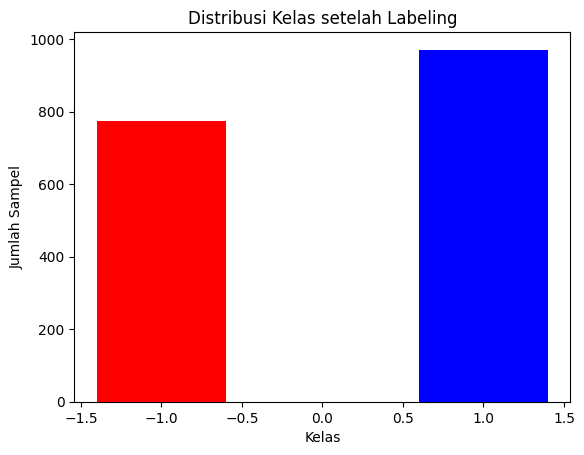

In [ ]:
import pandas as pd

# Load dataset yang telah dilabeli
data_labeled = pd.read_csv('HasilDataBmkg.csv')  # Gantilah dengan nama file dataset yang telah dilabeli

# Cek distribusi kelas
class_distribution = data_labeled['polarity'].value_counts()

# Tampilkan distribusi kelas
print("Distribusi Kelas setelah Labeling:")
print(class_distribution)

# Visualisasi distribusi kelas (opsional)
import matplotlib.pyplot as plt

plt.bar(class_distribution.index, class_distribution.values, color=['blue', 'red'])
plt.xlabel('Kelas')
plt.ylabel('Jumlah Sampel')
plt.title('Distribusi Kelas setelah Labeling')
plt.show()

# **TF-IDF**

In [ ]:
tweet_df = pd.read_csv('HasilDataBmkg.csv')

In [ ]:
tweet_df.head()

,Tweets,polarity
0,konyol bmkg,-1
1,kasih hujan bmkg,1
2,lelucon abang terus bmkg sudah dijelasin pakai...,1
3,resmi diterbitkan pagi bmkg waktu malam dibebe...,1
4,sesar peta bmkg tidak data sesar aktif situ,-1


In [ ]:
!pip install pandas matplotlib
!pip install scikit-learn

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, recall_score, precision_score
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import LabelEncoder
from scipy.sparse import vstack
from scipy.sparse import csr_matrix

In [ ]:
X = tweet_df['Tweets']
y = tweet_df['polarity']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

vectorizer = TfidfVectorizer()
X_train = vectorizer.fit_transform(X_train)
X_test = vectorizer.transform(X_test)
Encoder = LabelEncoder()
y_train = Encoder.fit_transform(y_train)
y_test = Encoder.fit_transform(y_test)

In [ ]:
print(X_train.shape[0])
print(X_test.shape[0])

1396
350


In [ ]:
y_train.shape

(1396,)

In [ ]:
X_train

<1396x2557 sparse matrix of type '<class 'numpy.float64'>'
	with 10946 stored elements in Compressed Sparse Row format>

In [ ]:
print(X_train)

  (0, 1923)	0.3164750578624929
  (0, 977)	0.4149690435101747
  (0, 2321)	0.4149690435101747
  (0, 111)	0.338763693823126
  (0, 1786)	0.3322890967453842
  (0, 2446)	0.3080013117446461
  (0, 2005)	0.34610398658817054
  (0, 292)	0.06815942408632669
  (0, 857)	0.1502176661917042
  (0, 2039)	0.2973284507785492
  (1, 2156)	0.3351635645777659
  (1, 1391)	0.32978524749608057
  (1, 1145)	0.42598353191103033
  (1, 569)	0.37427759551319423
  (1, 220)	0.386869500975602
  (1, 1879)	0.42598353191103033
  (1, 1211)	0.35529059557837056
  (2, 2425)	0.43580090215910955
  (2, 328)	0.32852510893255565
  (2, 342)	0.530623964847577
  (2, 1948)	0.338508636923139
  (2, 1883)	0.3250730011718724
  (2, 278)	0.43580090215910955
  (2, 292)	0.10200026824696415
  (3, 54)	0.2706672869894292
  :	:
  (1392, 173)	0.5901808855182277
  (1392, 1795)	0.7044904068370881
  (1392, 659)	0.39418243117043505
  (1393, 25)	0.7715947976303416
  (1393, 1923)	0.6218555943503576
  (1393, 292)	0.13392941441280032
  (1394, 204)	0.3375497

# **SMOTE**

In [ ]:
#data preprocessing
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest, f_classif, VarianceThreshold
from sklearn.model_selection import train_test_split

#supervised machine learning
from sklearn.svm import SVC
from sklearn.svm import SVC, LinearSVC
from sklearn.metrics import accuracy_score

In [ ]:
df_ujicoba = pd.read_csv('HasilDataBmkg.csv')

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state=42)

In [ ]:
print(X_train.shape[0])
print(X_test.shape[0])

1571
175


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer()
vectorizer.fit(X_train)

CountVectorizer()

In [ ]:
X_train

,Tweets
544,bmkg gnku isine smp sama ngawi dn sktrnybr rbh...
495,gempa selesai buka twitter bmkg ngomong kaget ...
478,bmkg numpang ucap terima kasih informasi
44,sebentar lelet bmkg
1185,admin aplikasi bmkg error admin gempa belum ca...
...,...
1130,notif dari bmkg gempa allah lindung
1294,pokok ganjar baik
860,ah rm bmkg
1459,guysss hujan air tapi banyak banjir jaga teman...


In [ ]:
X_train = vectorizer.transform(X_train)
X_test = vectorizer.transform(X_test)

In [ ]:
X_train.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [ ]:
from imblearn.over_sampling import SMOTE
import pandas as pd

In [ ]:
print("Sebelum OverSampling, Hitung polarity '1': {}".format(sum(y_train==1)))
print("Sebelum OverSampling,  Hitung polarity '-1': {} \n".format(sum(y_train==-1)))

sm = SMOTE(random_state=42)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train.ravel())

print('Setelah OverSampling, the shape of train_X: {}'.format(X_train_res.shape))
print('Setelah OverSampling, the shape of train_y: {} \n'.format(y_train_res.shape))

print("Setelah OverSampling,  Hitung polarity '1': {}".format(sum(y_train_res==1)))
print("Setelah OverSampling, Hitung polarity '-1': {}".format(sum(y_train_res==-1)))

Sebelum OverSampling, Hitung polarity '1': 874
Sebelum OverSampling,  Hitung polarity '-1': 697 

Setelah OverSampling, the shape of train_X: (1748, 2746)
Setelah OverSampling, the shape of train_y: (1748,) 

Setelah OverSampling,  Hitung polarity '1': 874
Setelah OverSampling, Hitung polarity '-1': 874


# **Implementasi SVM**

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, recall_score, precision_score
from sklearn.feature_extraction.text import CountVectorizer

In [ ]:
svm = SVC(kernel='linear',  C=0.1, class_weight={-1: 1, 1: 1})
svm.fit(X_train, y_train)

SVC(C=0.1, class_weight={-1: 1, 1: 1}, kernel='linear')

In [ ]:
y_pred = svm.predict(X_test)

In [ ]:
confusion_matrix = confusion_matrix(y_test, y_pred)
confusion_matrix

array([[42, 36],
       [ 5, 92]])

# Evaluasi Model

In [ ]:
#model evaluation
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.metrics import confusion_matrix

In [ ]:
svm = SVC(probability=True)  # Model SVM dengan probabilitas
svm.fit(X_train, y_train)

SVC(probability=True)

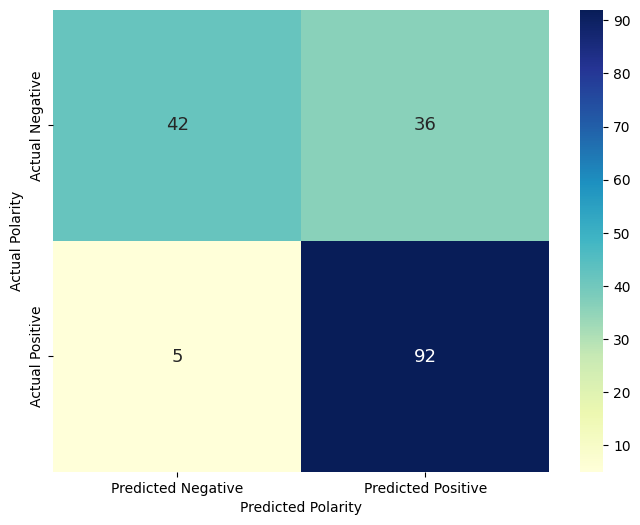

In [ ]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Contoh confusion matrix
confusion_matrix = confusion_matrix(y_test, y_pred)

# Membuat DataFrame dari confusion matrix
confusion_df = pd.DataFrame(confusion_matrix, index=['Actual Negative', 'Actual Positive'], columns=['Predicted Negative', 'Predicted Positive'])

# Membuat heatmap
plt.figure(figsize=(8, 6))
heatmap = sns.heatmap(confusion_df, annot=True, cmap="YlGnBu", fmt='g', annot_kws={"fontsize": 13})
heatmap.set_xlabel('Predicted Polarity')
heatmap.set_ylabel('Actual Polarity')
plt.show()

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy model:", round(accuracy,2))

recall = recall_score(y_test, y_pred)
print("Recall model:", round(recall,2))

precision = precision_score(y_test, y_pred)
print("Precision model:", round(precision,2))

f1 = f1_score(y_test, y_pred)
print("F1-Score:", round(f1,2))

auc = roc_auc_score(y_test, y_pred)
print("AUC Score:", round(auc,2))

Accuracy model: 0.77
Recall model: 0.95
Precision model: 0.72
F1-Score: 0.82
AUC Score: 0.74


In [ ]:
classification_report
print('Accuracy of SVM classifier on test set: {:.2f}'.format(svm.score(X_test, y_test)))

print(confusion_matrix)
print(classification_report(y_test, y_pred))

Accuracy of SVM classifier on test set: 0.77
[[42 36]
 [ 5 92]]
              precision    recall  f1-score   support

          -1       0.89      0.54      0.67        78
           1       0.72      0.95      0.82        97

    accuracy                           0.77       175
   macro avg       0.81      0.74      0.74       175
weighted avg       0.80      0.77      0.75       175



# **SVM+PSO**

In [ ]:
!pip install pyswarm

  Preparing metadata (setup.py) ... done
  Created wheel for pyswarm: filename=pyswarm-0.6-py3-none-any.whl size=4464 sha256=a1af5345918ed1d4144fa6bf7f0a9df266864cc3b8e398fd7554b417909e288c
  Stored in directory: /root/.cache/pip/wheels/71/67/40/62fa158f497f942277cbab8199b05cb61c571ab324e67ad0d6
Successfully built pyswarm


In [ ]:
import numpy as np
from sklearn.svm import SVC
from pyswarm import pso
from sklearn.metrics import accuracy_score, confusion_matrix

# Fungsi tujuan PSO
def objective_function(weights, X_train, y_train, X_test, y_test):
    # Mengonversi bobot menjadi array yang sesuai dengan jumlah fitur
    weights_array = np.array(weights)

    # Menetapkan bobot ke model SVM
    svm = SVC(kernel='linear', C=0.1, class_weight={-1: 1, 1: 1})
    svm.coef__ = weights_array

    # Melatih model SVM
    svm.fit(X_train, y_train)

    # Melakukan prediksi pada data uji
    y_pred = svm.predict(X_test)

    # Menghitung akurasi
    accuracy = accuracy_score(y_test, y_pred)

    # Mengembalikan nilai negatif dari akurasi karena PSO mencari nilai minimum
    return -accuracy

# Menetapkan jumlah fitur (ganti dengan jumlah fitur sesuai dataset Anda)
num_features = X_train.shape[1]

# Menetapkan batas bobot untuk PSO
lb = [0] * num_features  # minimal weight
ub = [5] * num_features  # maximal weight

# Menjalankan PSO untuk mendapatkan bobot terbaik
best_weights, _ = pso(objective_function, lb, ub, args=(X_train, y_train, X_test, y_test),
                      swarmsize=10, maxiter=30)

# Mengonversi bobot menjadi array yang sesuai dengan jumlah fitur
best_weights_array = np.array(best_weights)

# Menetapkan bobot terbaik ke model SVM
best_svm = SVC(kernel='linear', C=1, class_weight={-1: 5, 1: 1})
best_svm.fit(X_train, y_train)

# Melatih model SVM dengan bobot terbaik pada data latih
best_svm.fit(X_train, y_train)

# Melakukan prediksi pada data uji
y_pred_pso = best_svm.predict(X_test)

# Menghitung akurasi setelah penerapan PSO
accuracy_pso = accuracy_score(y_test, y_pred_pso)
confusion_matrix_pso = confusion_matrix(y_test, y_pred_pso)

# Menampilkan hasil
print("Akurasi setelah penerapan PSO:", accuracy_pso)
print("Confusion Matrix setelah penerapan PSO:\n", confusion_matrix_pso)

Stopping search: maximum iterations reached --> 30
Akurasi setelah penerapan PSO: 0.8685714285714285
Confusion Matrix setelah penerapan PSO:
 [[62 16]
 [ 7 90]]


In [ ]:
accuracy_pso = accuracy_score(y_test, y_pred_pso)
print("Accuracy model after PSO:", round(accuracy_pso, 2))

recall_pso = recall_score(y_test, y_pred_pso)
print("Recall model after PSO:", round(recall_pso, 2))

precision_pso = precision_score(y_test, y_pred_pso)
print("Precision model after PSO:", round(precision_pso, 2))

f1_pso = f1_score(y_test, y_pred_pso)
print("F1-Score after PSO:", round(f1_pso, 2))

auc_pso = roc_auc_score(y_test, y_pred_pso)
print("AUC Score after PSO:", round(auc_pso, 2))

Accuracy model after PSO: 0.87
Recall model after PSO: 0.93
Precision model after PSO: 0.85
F1-Score after PSO: 0.89
AUC Score after PSO: 0.86


In [ ]:
classification_report
y_pred_pso = best_svm.predict(X_test)
print('Accuracy of SVM classifier on test set: {:.2f}'.format(best_svm.score(X_test, y_test)))

confusion_matrix_pso = confusion_matrix(y_test, y_pred_pso)
print(confusion_matrix_pso)
print(classification_report(y_test, y_pred_pso))

Accuracy of SVM classifier on test set: 0.87
[[62 16]
 [ 7 90]]
              precision    recall  f1-score   support

          -1       0.90      0.79      0.84        78
           1       0.85      0.93      0.89        97

    accuracy                           0.87       175
   macro avg       0.87      0.86      0.87       175
weighted avg       0.87      0.87      0.87       175

